In [197]:
import import_ipynb
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
import numpy as np
from func import prep, rir

In [198]:
def nmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    denom = np.mean(y_true**2)
    return 10*np.log10(mse/denom)  # 스칼라

In [199]:
rocation = "../sound/25th_Huey_Helicopter_no_music_03.wav"
X_n, fs = prep(rocation, 16000)
source_to_err = rir([5, 4, 3], [1, 1, 1], [4, 3, 2]) # room_size, speaker_pos, mic_pos
loud_to_err  = rir([5, 4, 3], [2, 2, 2], [4, 3, 2]) # room_size, speaker_pos, mic_pos
print(len(loud_to_err))
print(len(source_to_err))
# parameters
filter_length = 2048
mu = 0.01

2509
2557


<string>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.


In [200]:
arr = np.arange(0, 0.01, 0.0001)
nmse_list = [0]
for i in arr[1:]:
    print(i)
    mu = i
    d_n = fftconvolve(X_n, source_to_err, mode='full')
    W_z = np.zeros(filter_length)
    x_prime = fftconvolve(X_n, loud_to_err, mode='full')
    anti_noise_list = [0]*filter_length
    X_n_buffer = np.flip(X_n[0:filter_length])

    W_z = W_z.reshape(-1)
    X_n_buffer = X_n_buffer.reshape(-1)
    loud_to_err = loud_to_err.reshape(-1)
    x_prime = x_prime.reshape(-1)

    for i in range(len(X_n)-filter_length):
        y_n = np.sum(W_z * X_n_buffer * loud_to_err[:filter_length])
        anti_noise_list.append(y_n)
        e_n = d_n[i + filter_length] - y_n
        e_n =  np.asarray(e_n).reshape(-1)
        
        W_z = W_z+ mu * np.flip(x_prime[i : filter_length+i]) * e_n

        X_n_buffer = np.roll(X_n_buffer, 1)
        X_n_buffer[0] = X_n[filter_length + i]
    d_n = d_n[0:80000]
    anti_noise = np.array(anti_noise_list)
    nmse_list.append(nmse(d_n, d_n+anti_noise))

0.0001
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007
0.0008
0.0009000000000000001
0.001
0.0011
0.0012000000000000001
0.0013000000000000002
0.0014
0.0015
0.0016
0.0017000000000000001
0.0018000000000000002
0.0019
0.002
0.0021000000000000003
0.0022
0.0023
0.0024000000000000002
0.0025
0.0026000000000000003
0.0027
0.0028
0.0029000000000000002
0.003
0.0031000000000000003
0.0032
0.0033
0.0034000000000000002
0.0035
0.0036000000000000003
0.0037
0.0038
0.0039000000000000003
0.004
0.0041
0.004200000000000001
0.0043
0.0044
0.0045000000000000005
0.0046
0.0047
0.0048000000000000004
0.0049
0.005
0.0051
0.005200000000000001
0.0053
0.0054
0.0055000000000000005
0.0056
0.0057
0.0058000000000000005
0.0059
0.006
0.0061
0.006200000000000001
0.0063
0.0064
0.006500000000000001
0.0066
0.0067
0.0068000000000000005
0.006900000000000001
0.007
0.0071
0.007200000000000001
0.0073
0.0074
0.007500000000000001
0.0076
0.0077
0.0078000000000000005
0.0079
0.008
0.0081
0.0082
0.0083
0.00840000000

In [201]:
d_n = d_n[0:80000]
print(d_n[0:80000].shape)
print(len(anti_noise_list))

(80000,)
80000


<function matplotlib.pyplot.show(close=None, block=None)>

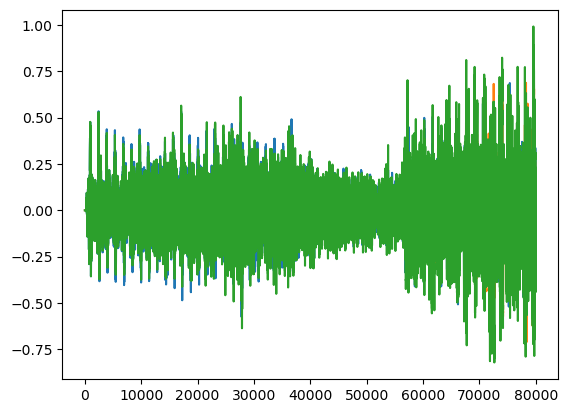

In [202]:
import matplotlib.pyplot as plt
plt.plot(d_n, label = "d(n)")
plt.plot(anti_noise_list, label = "anti")
plt.plot(d_n+np.array(anti_noise_list), label = "d(n)+anti")
plt.show

In [203]:
Audio(d_n, rate = 16000)


In [204]:
Audio(np.array(anti_noise_list), rate = 16000)


In [205]:
Audio(d_n+np.array(anti_noise_list), rate = 16000)

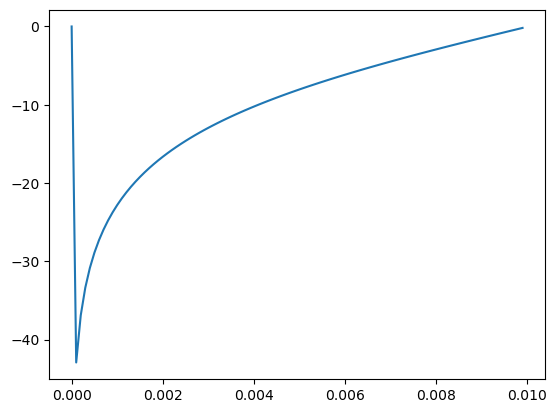

In [206]:
plt.plot(arr, nmse_list)
plt.show()